In [2]:
import math
import cv2
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
DEBUG = False

In [2]:
cv2.__version__

'3.4.2'

In [169]:
img = cv2.imread('1.cropped/john0002.jpg', 0)
ret,img = cv2.threshold(img, 127, 255, 0)
print(img.shape)
# Create an empty skeleton.
size = np.size(img)
skel = np.zeros(img.shape, np.uint8)

(3300, 2200)


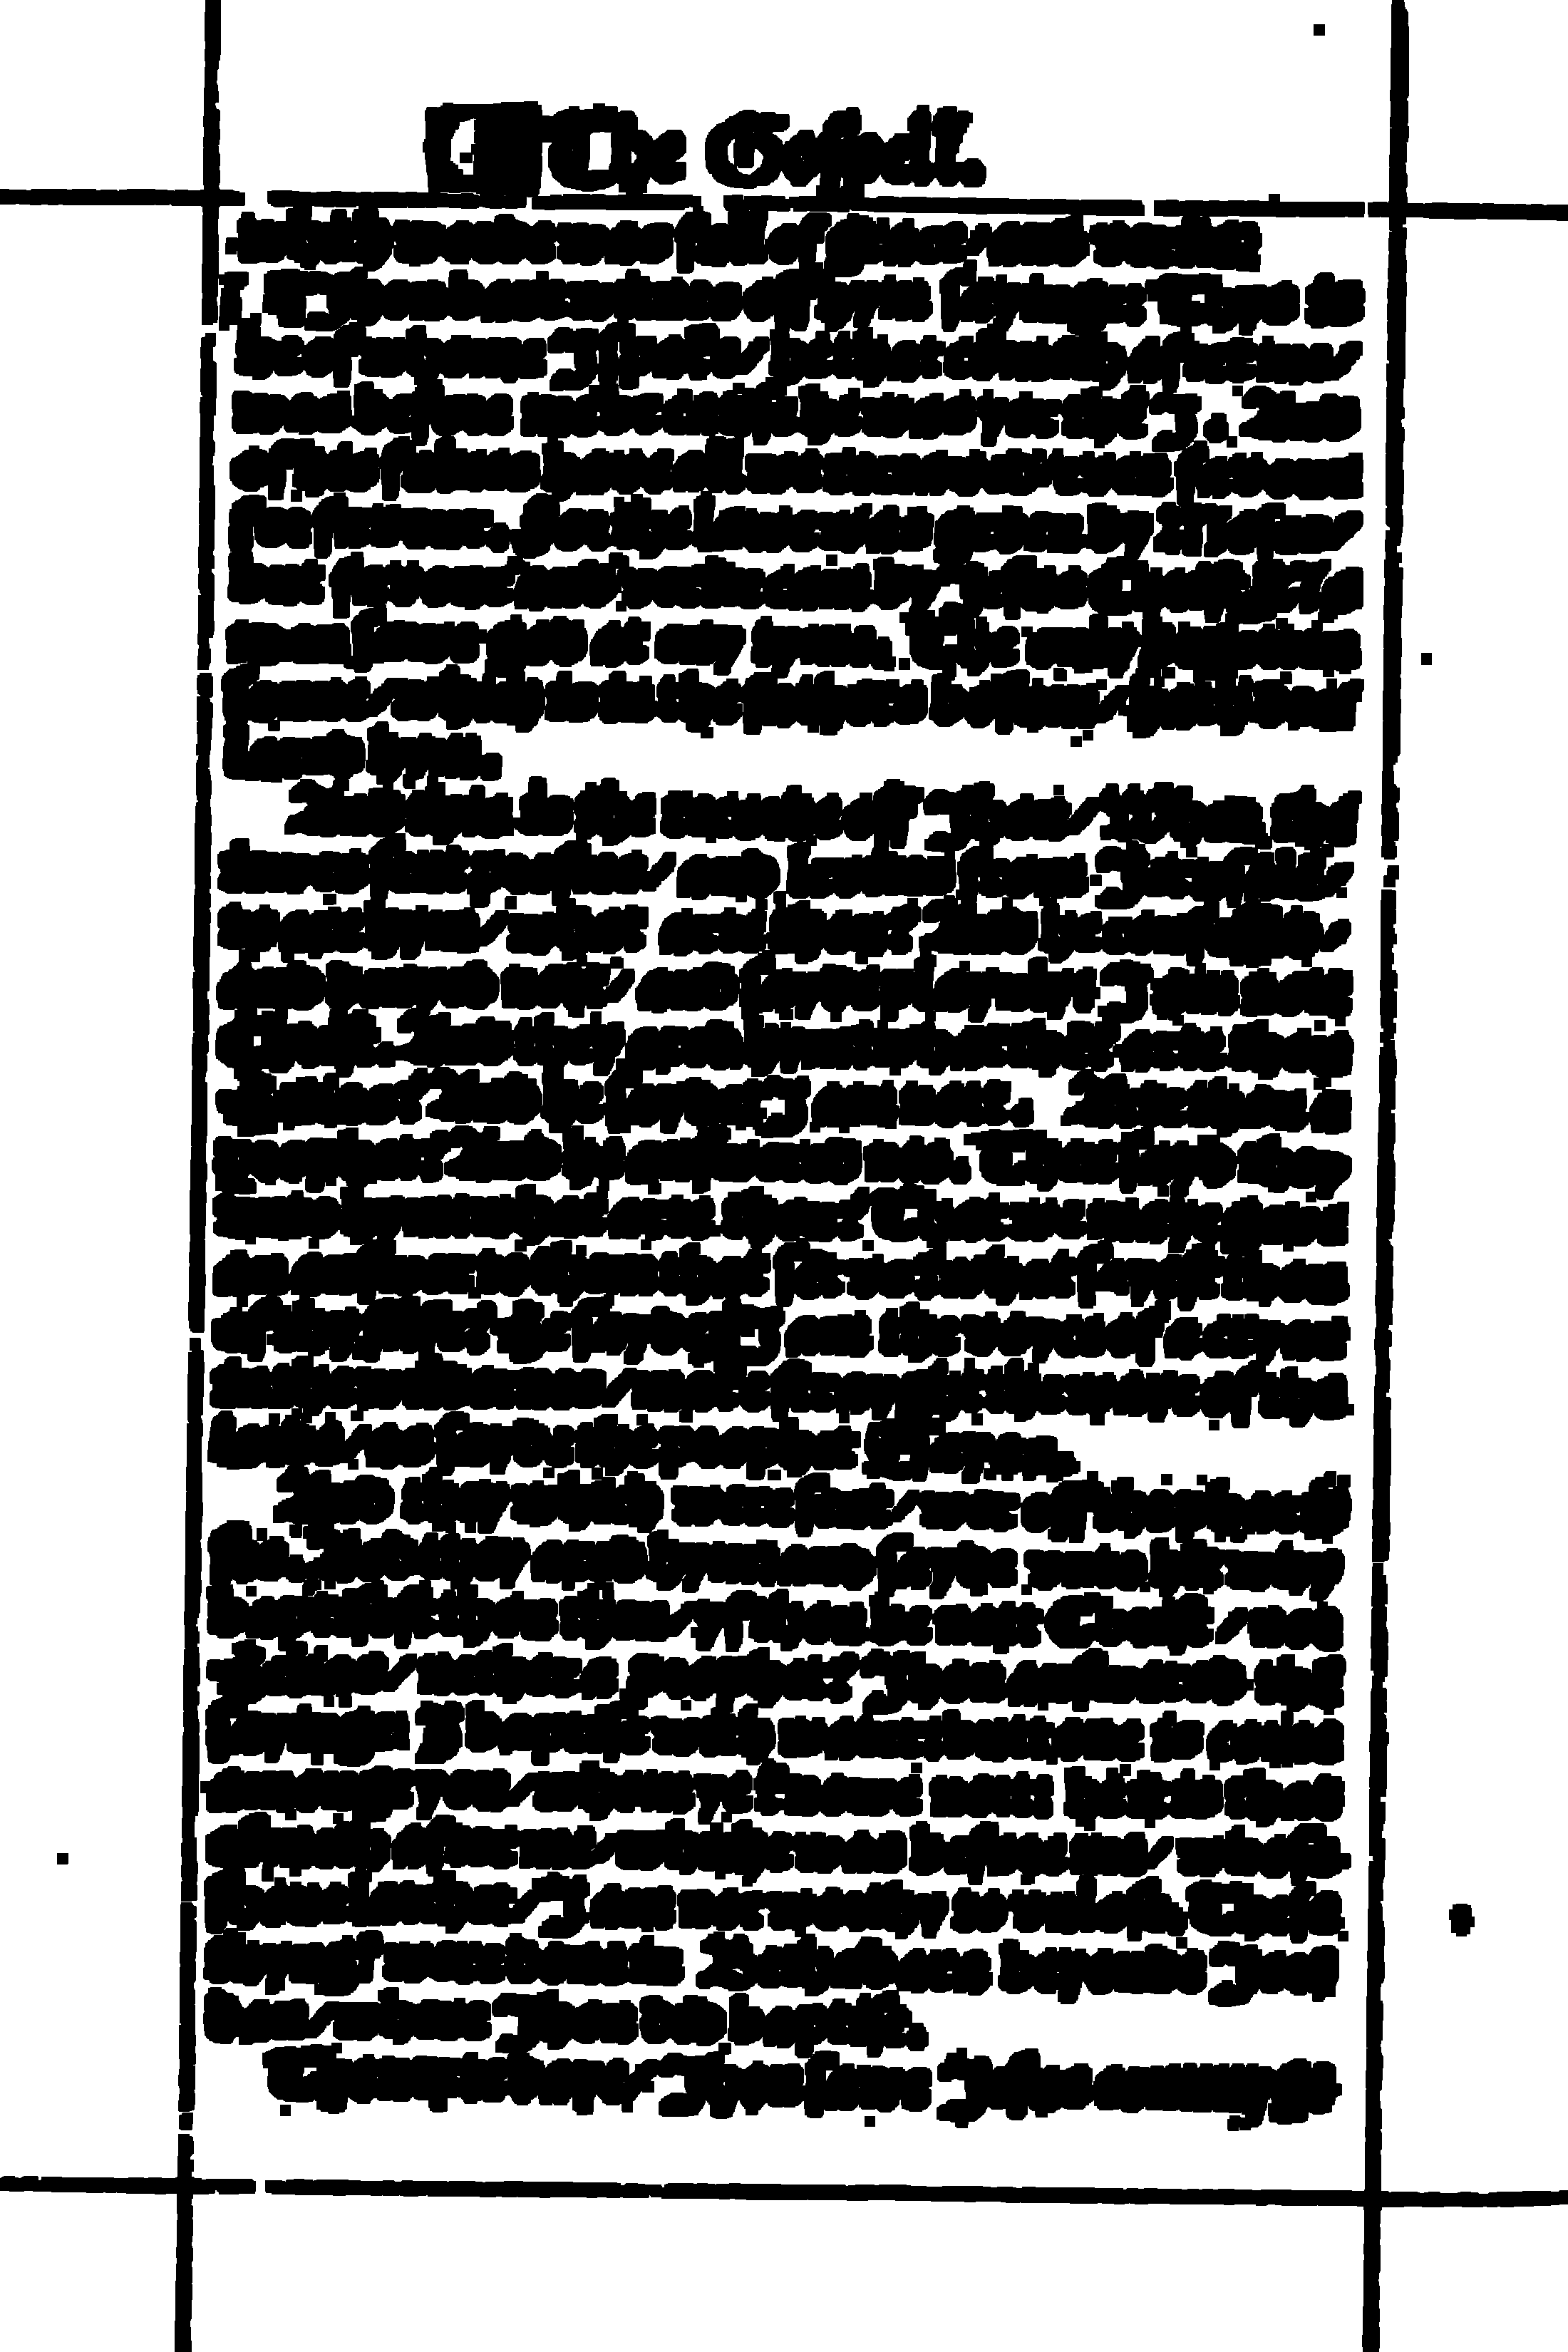

In [183]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
eroded = cv2.erode(img, kernel, iterations = 7)
dilated = cv2.dilate(img, kernel, iterations = 3)
opening = cv2.morphologyEx(eroded, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(eroded, cv2.MORPH_CLOSE, kernel)

Image.fromarray(closing)

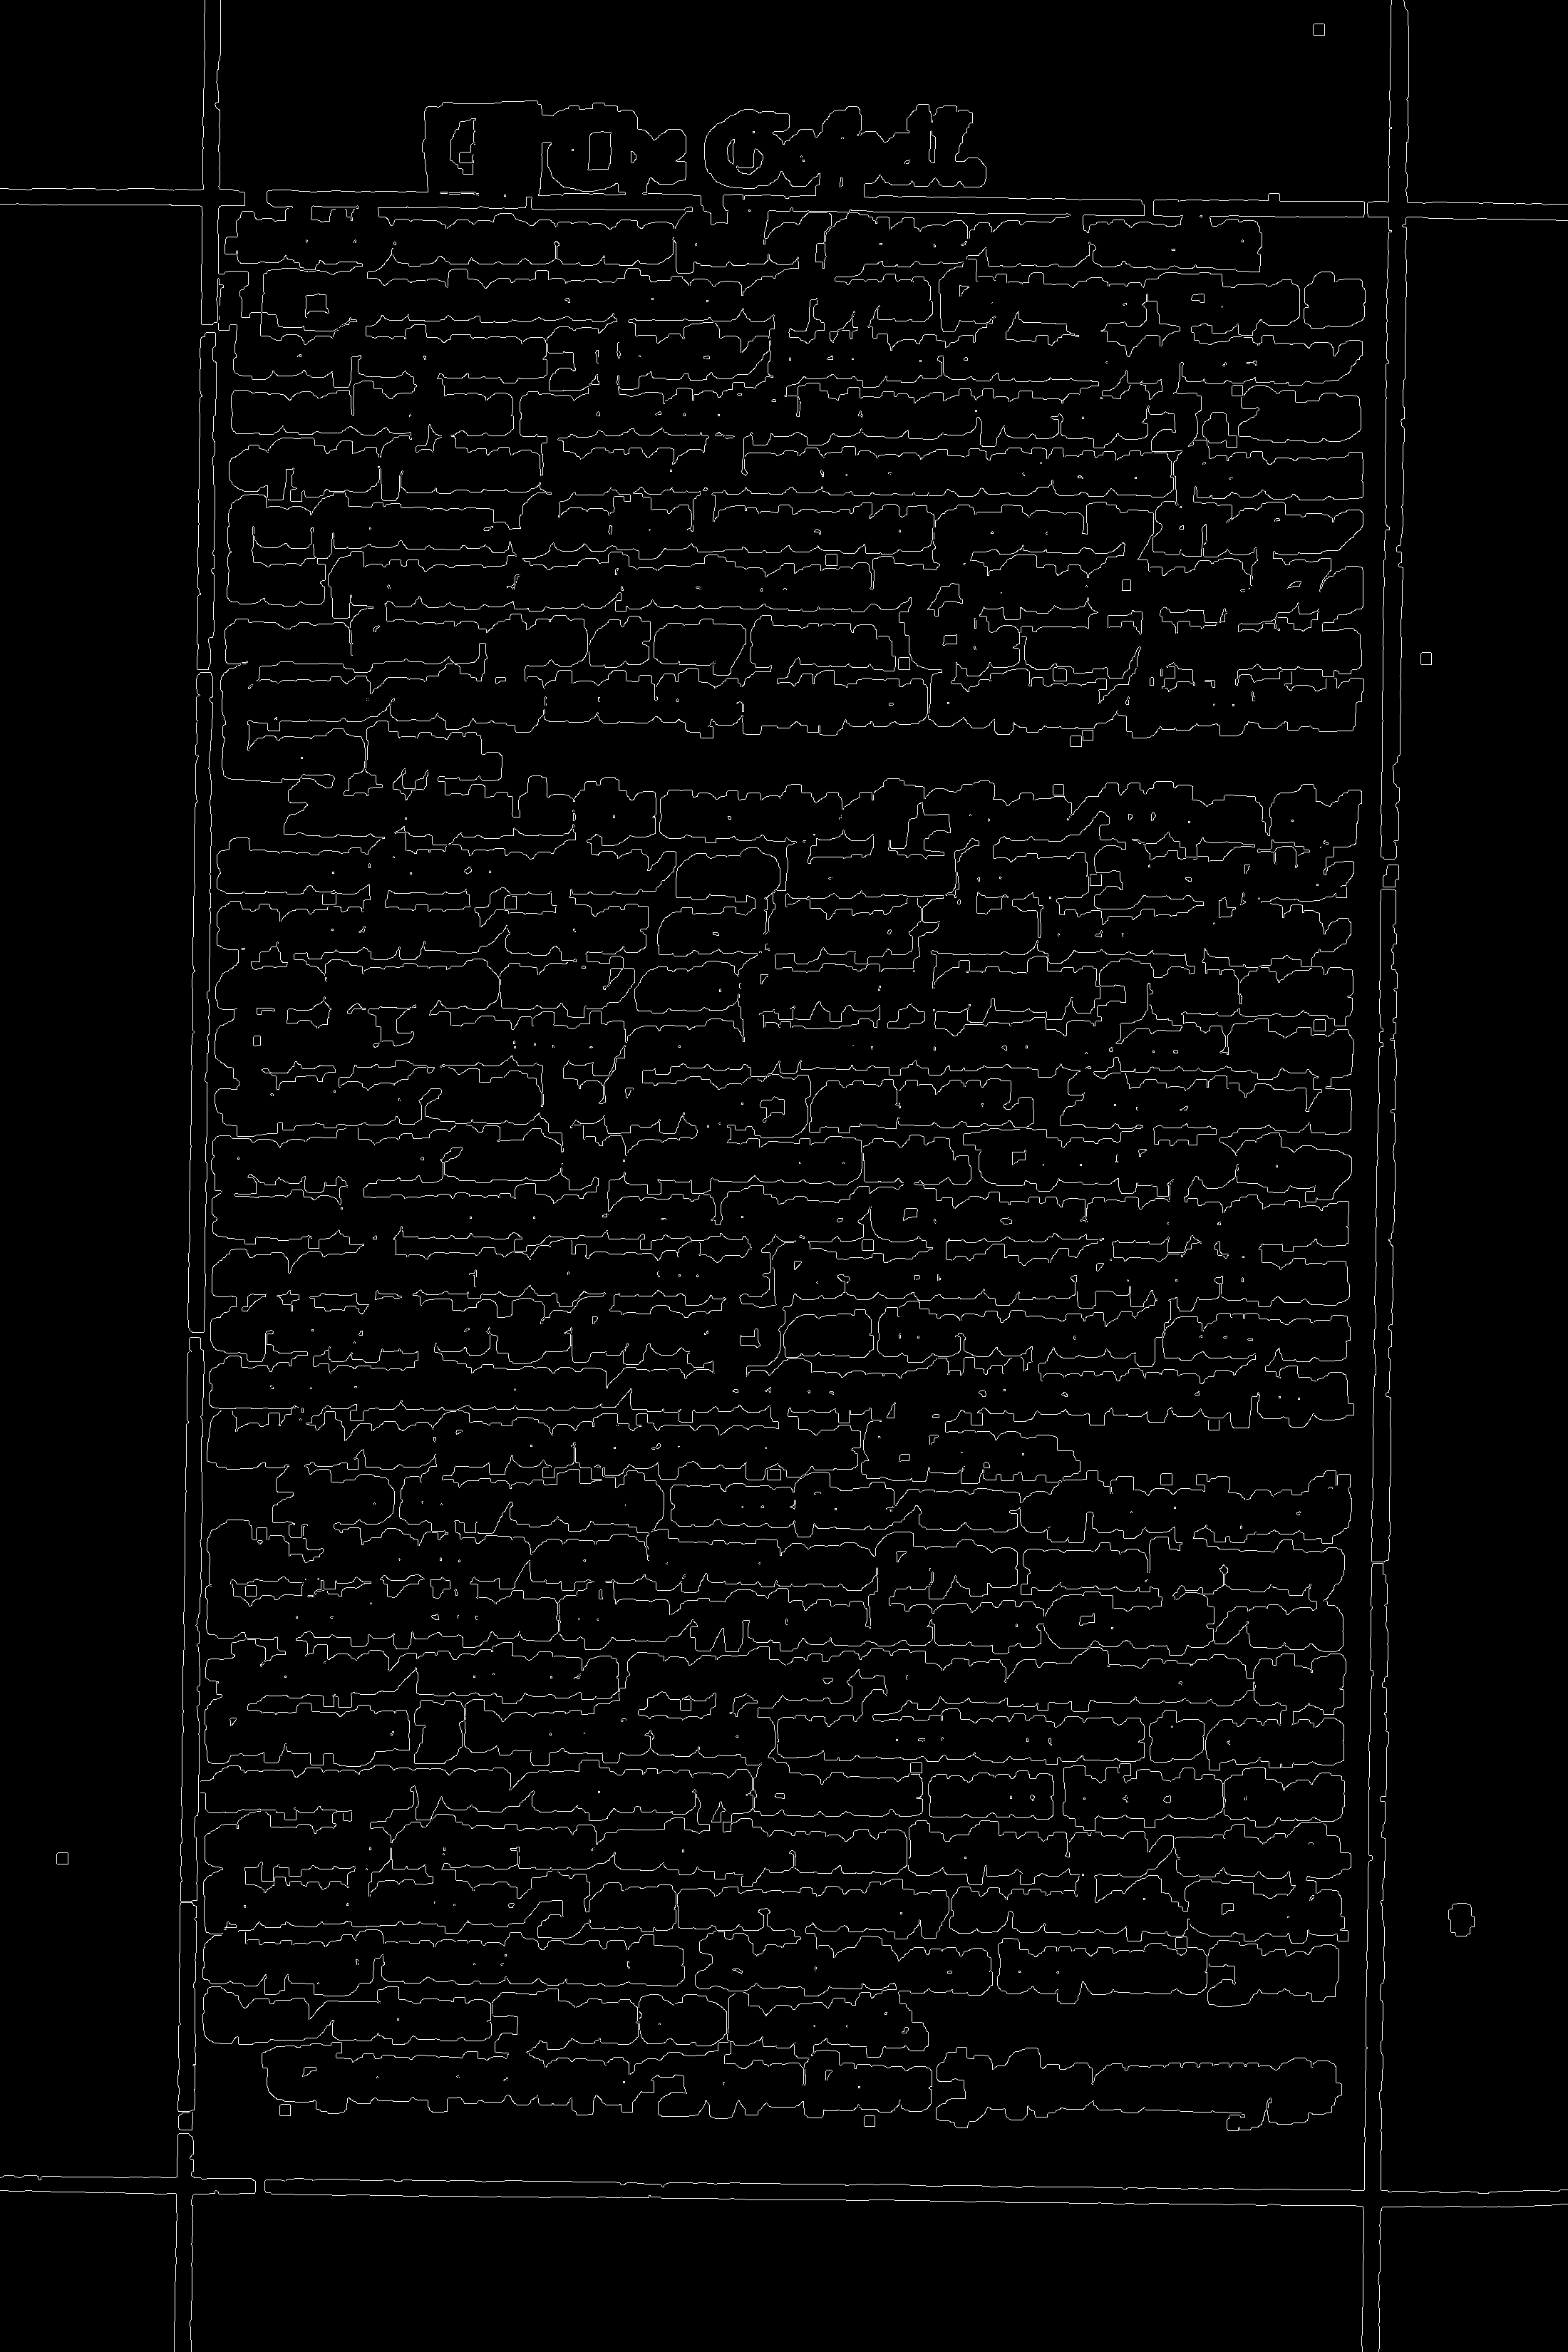

In [184]:
edges = cv2.Canny(closing, 100, 300, None, 3)
Image.fromarray(edges)

In [102]:
lines = cv2.HoughLines(edges, 1, np.pi / 180, 250, None, 0, 0)
len(lines)

17

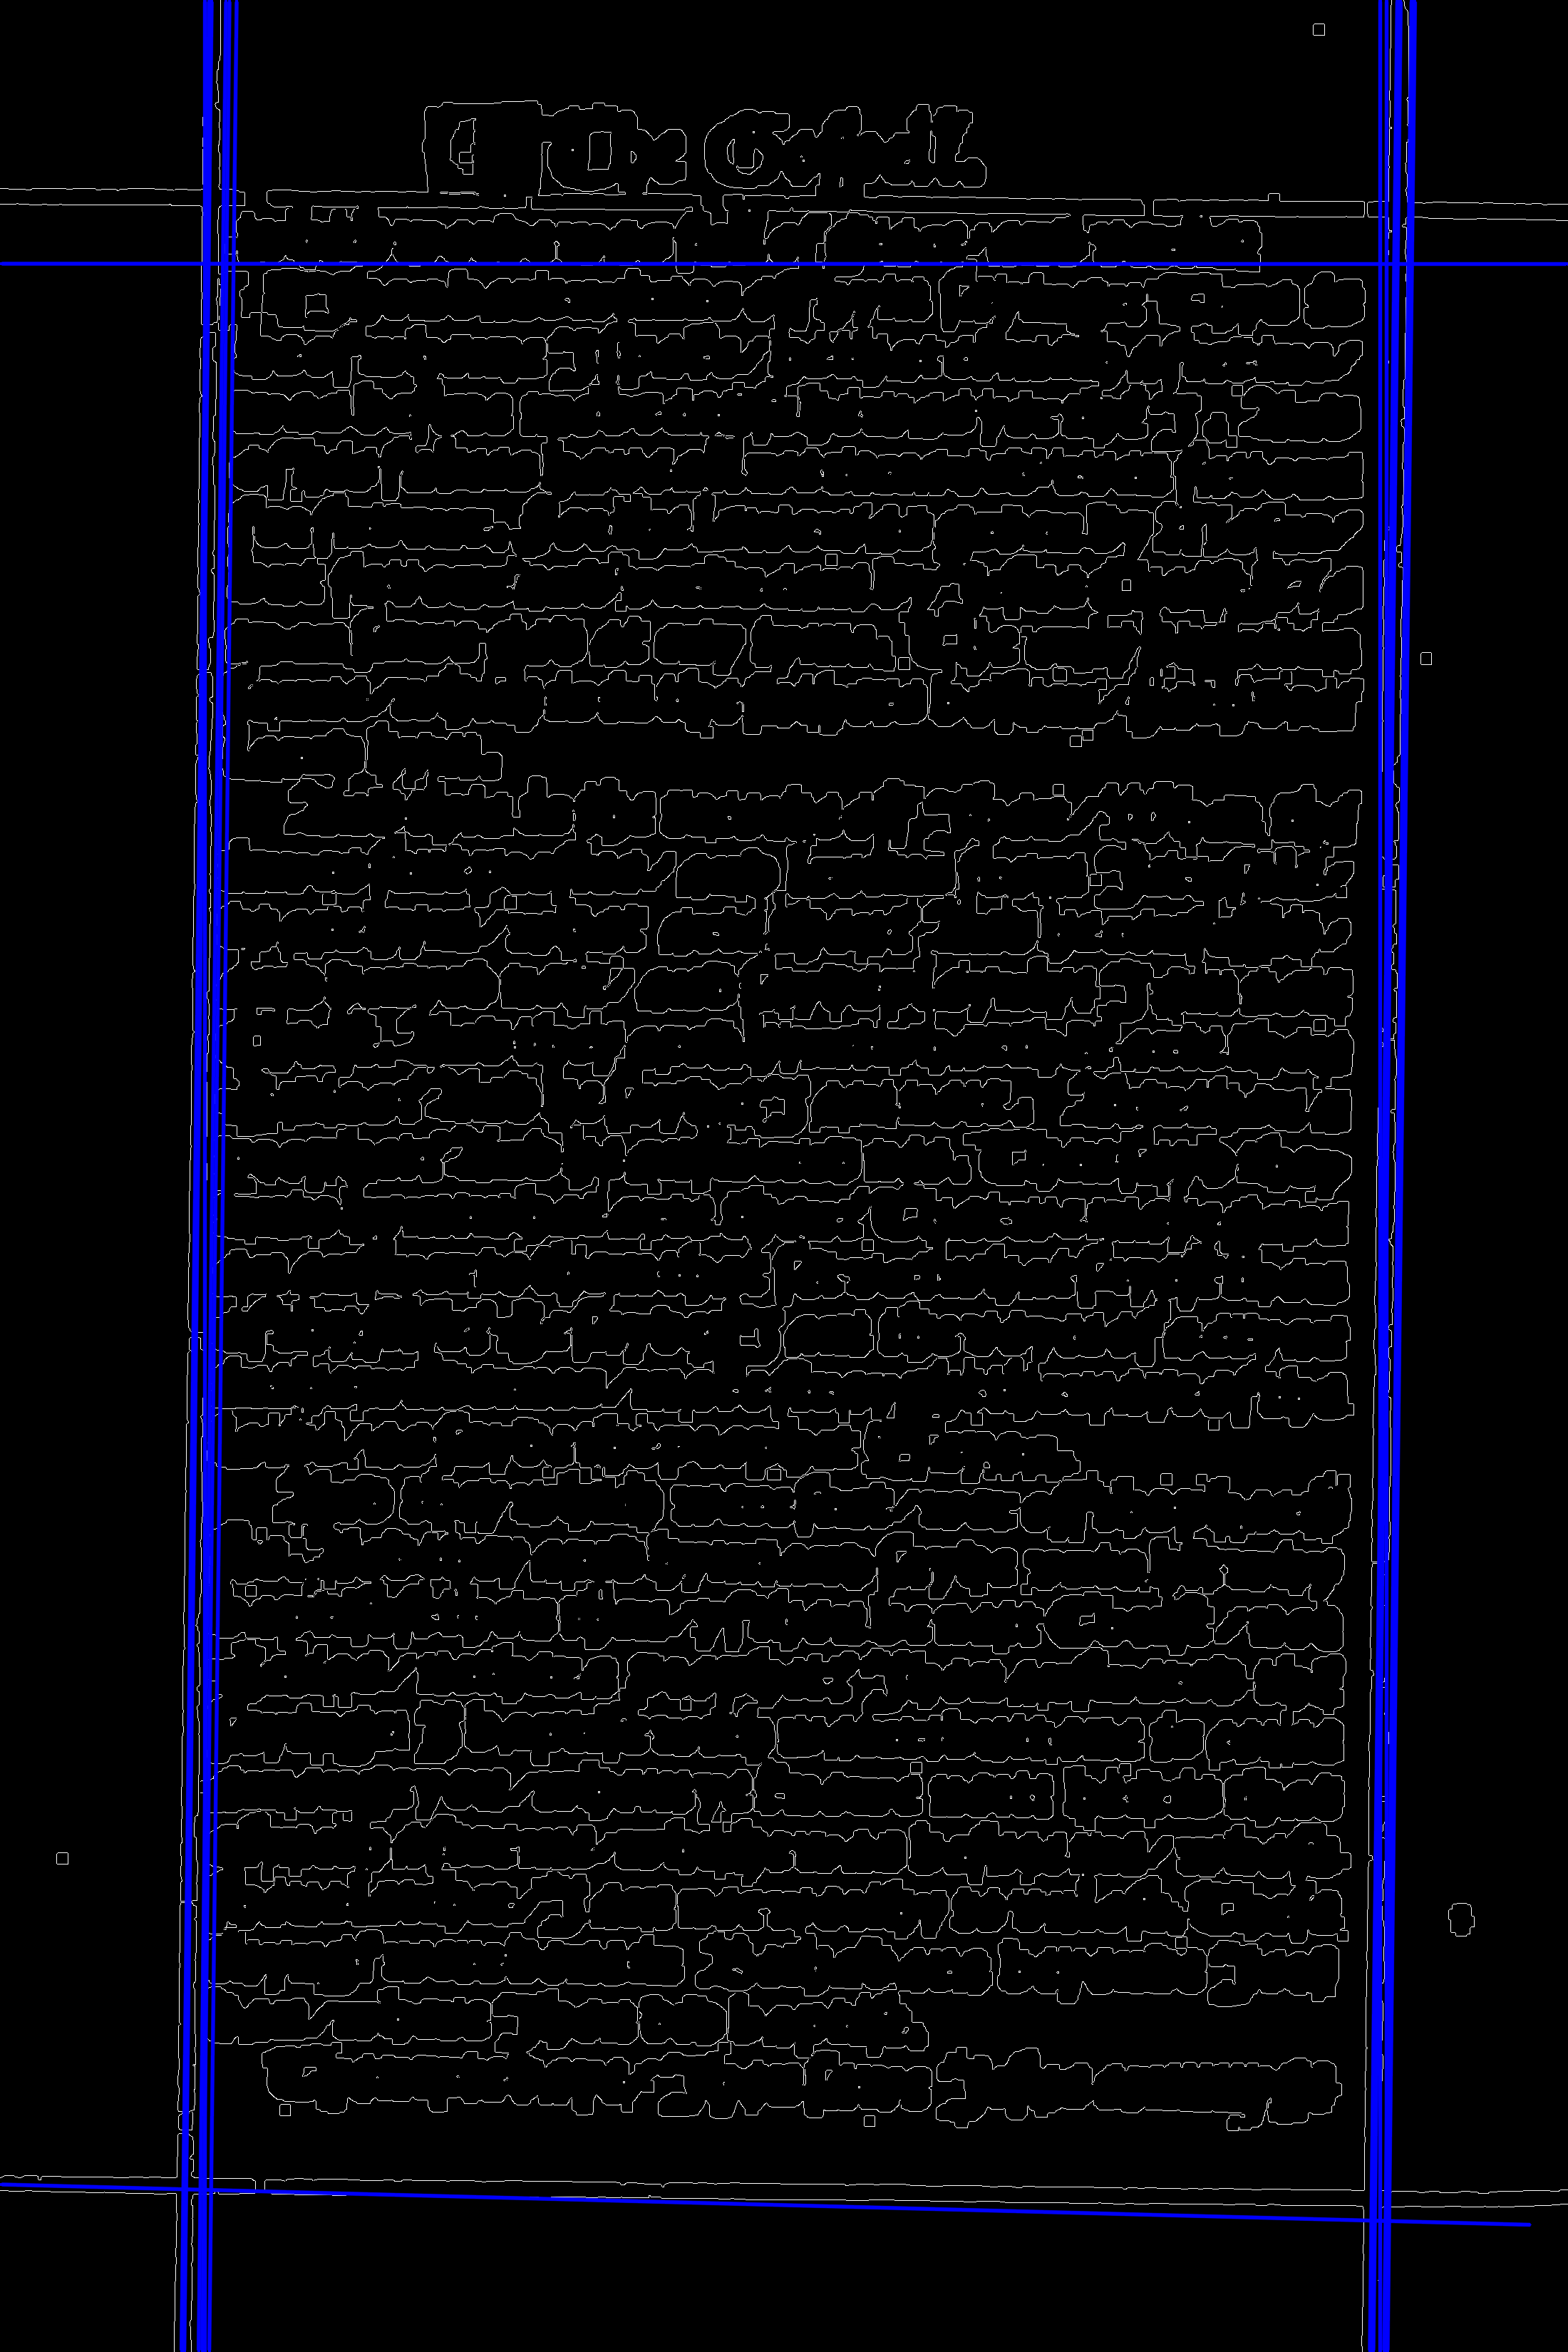

In [103]:
# Standard.
height, width = img.shape
edges_bgr = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
for i in range(0, len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + width*(-b)), int(y0 + height*(a)))
    pt2 = (int(x0 - width*(-b)), int(y0 - height*(a)))
    cv2.line(edges_bgr, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)
Image.fromarray(edges_bgr)

In [185]:
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 200, minLineLength=50, maxLineGap=30)
len(lines)

69

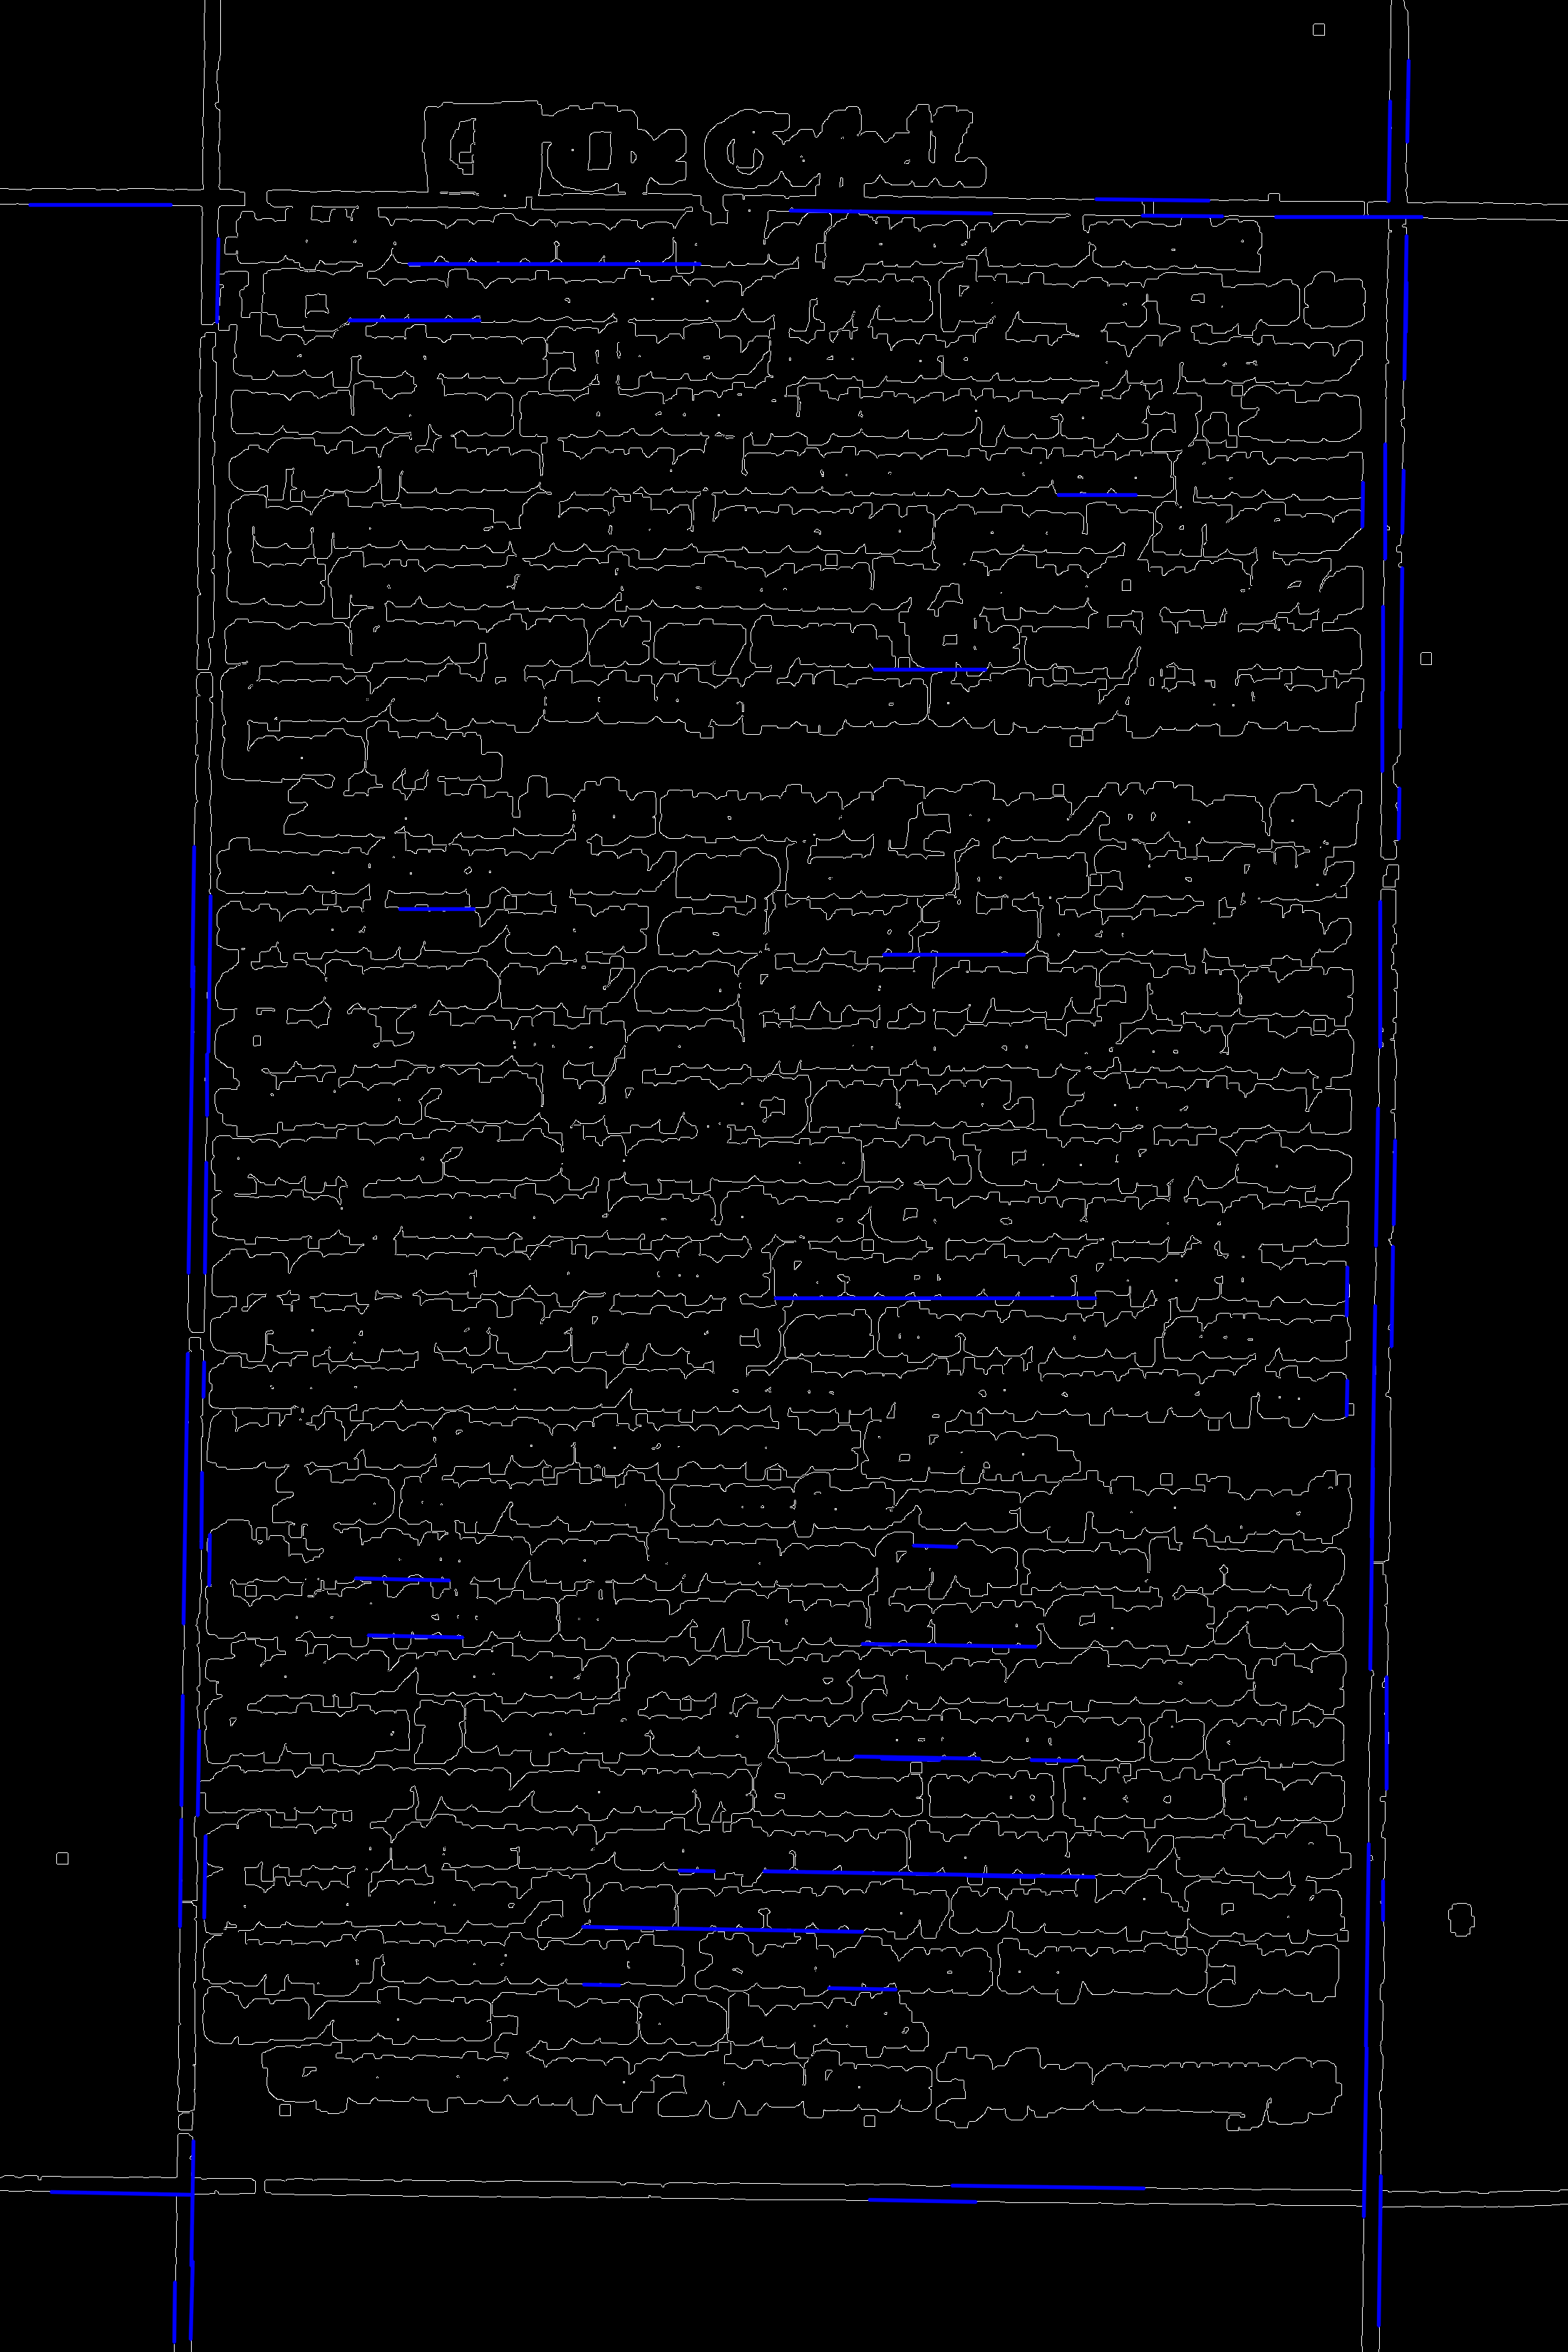

In [186]:
# Probabilistic.
edges_bgr = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
for i in range(0, len(lines)):
    x1, y1, x2, y2 = lines[i][0]
    pt1 = (x1, y1)
    pt2 = (x2, y2)
    cv2.line(edges_bgr, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)
Image.fromarray(edges_bgr)

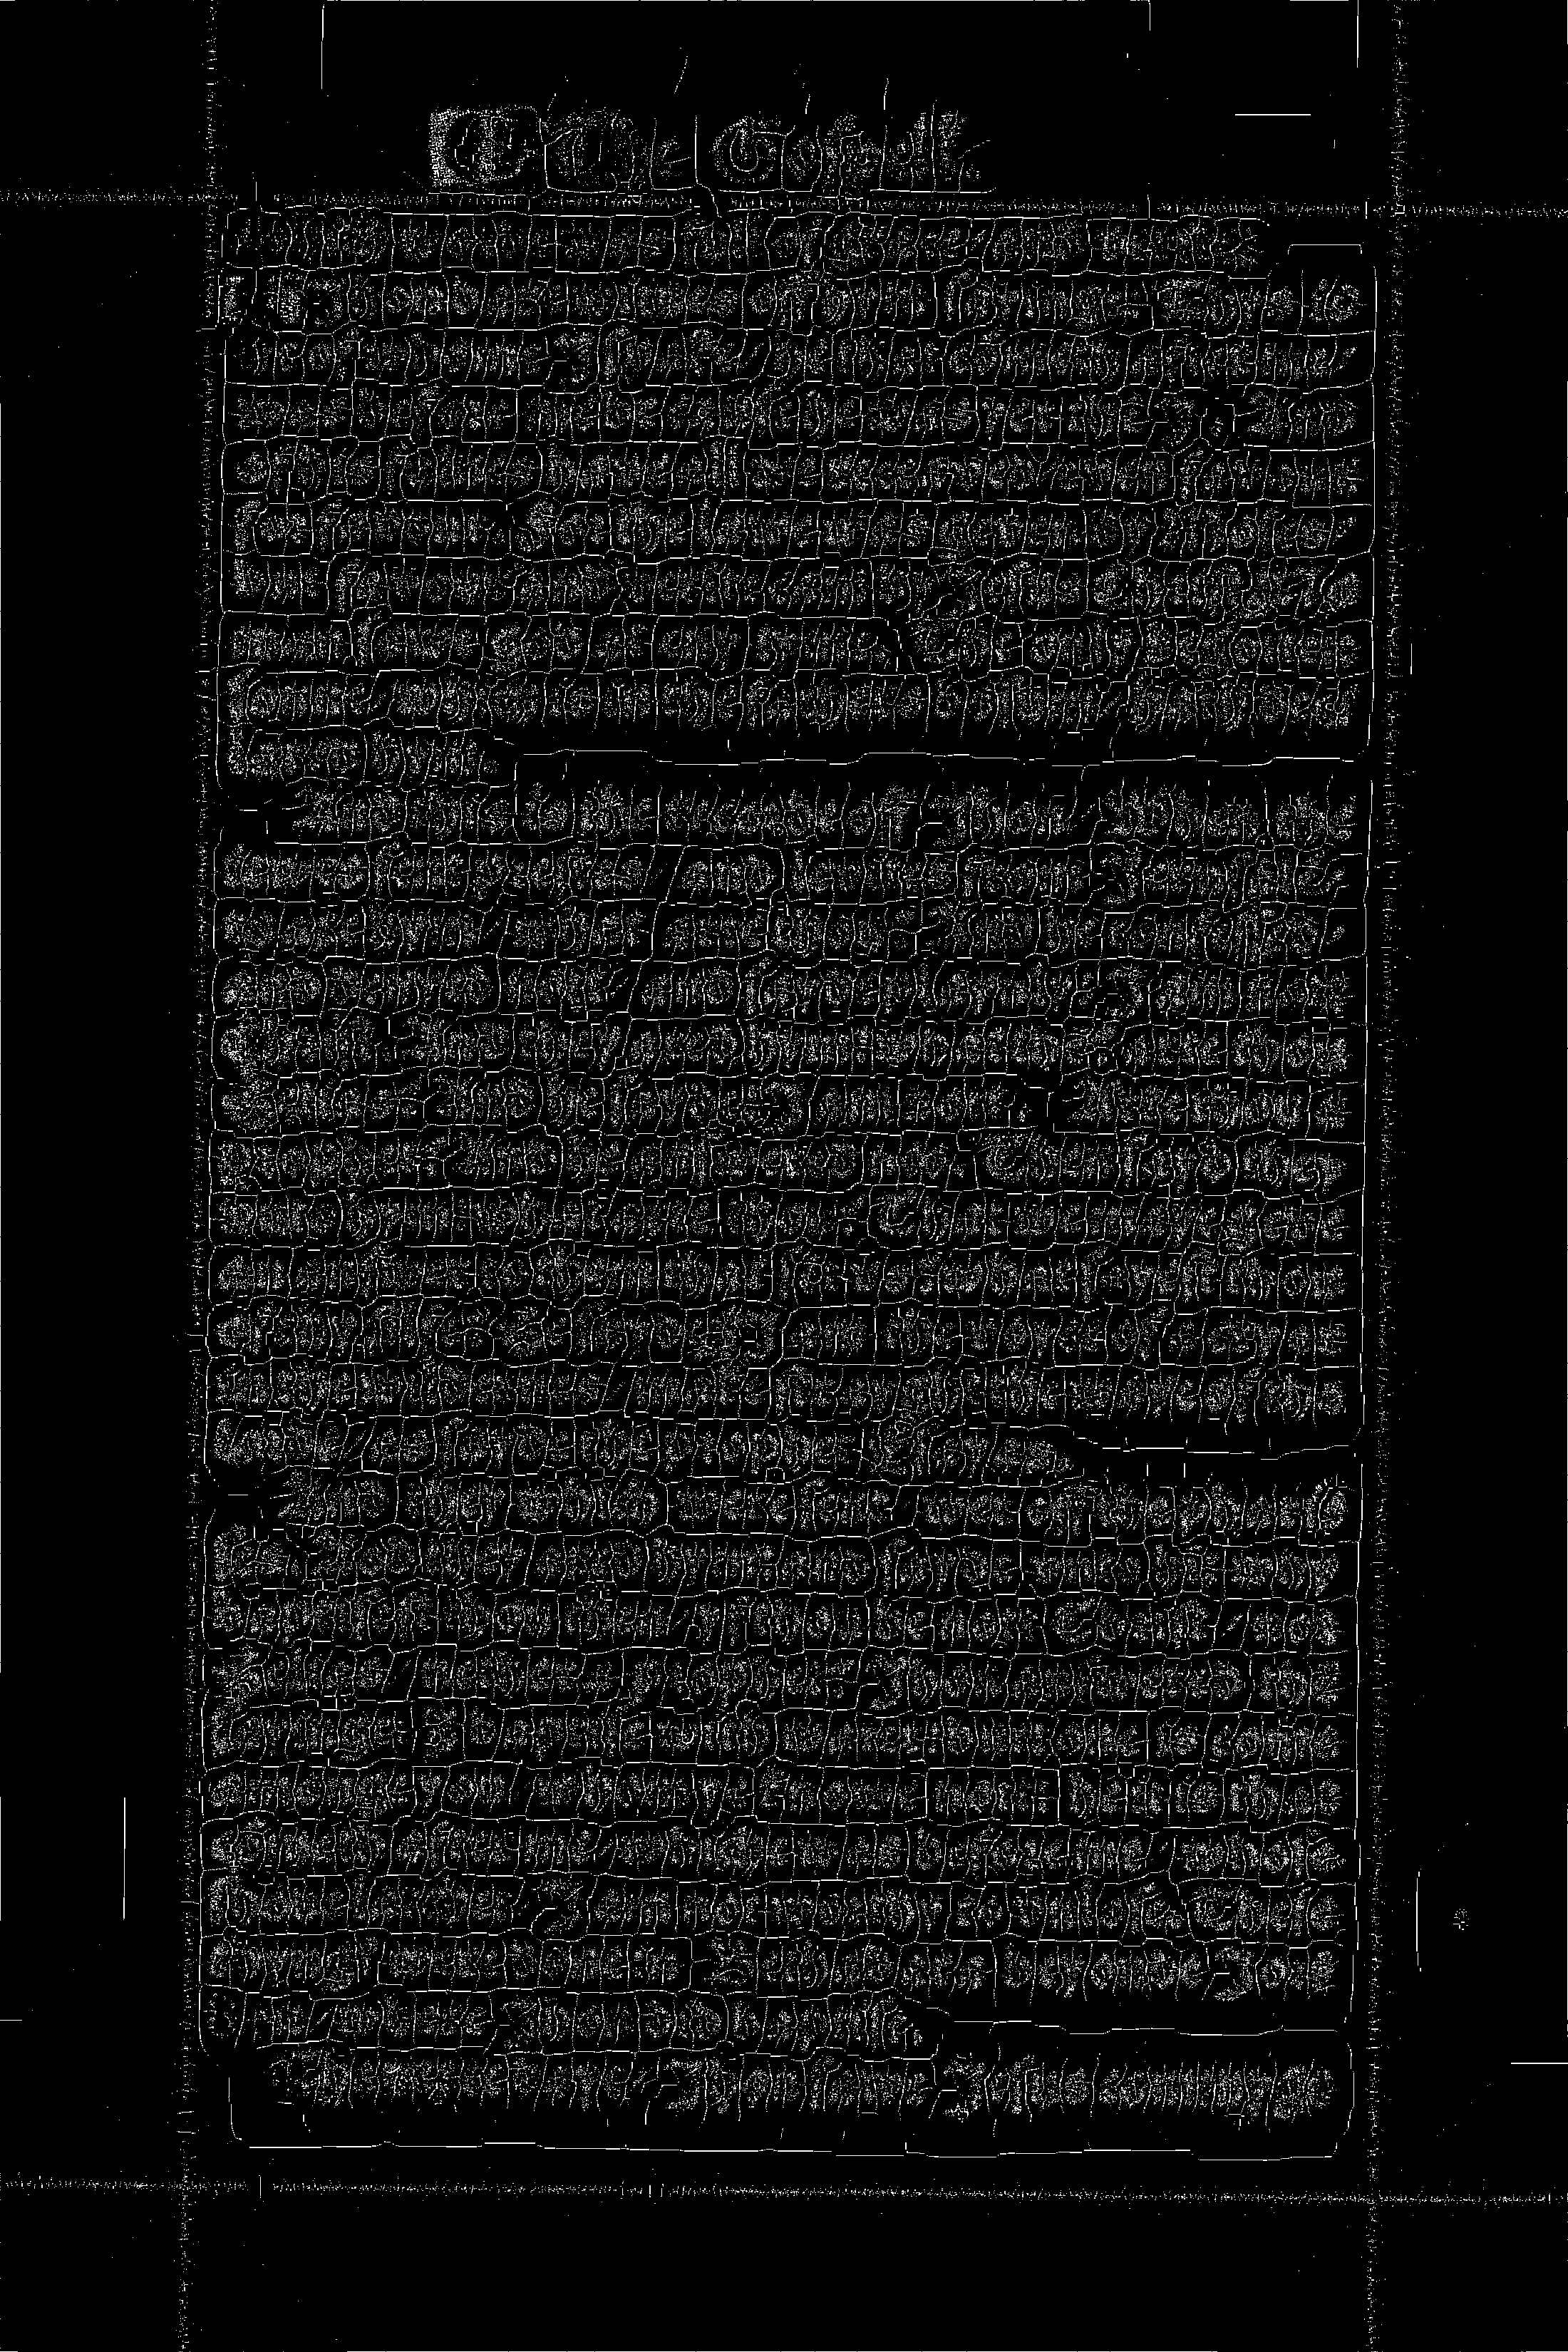

In [10]:
#kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

while True:
    # "Open" the image: erosion and then dilation
    opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    # Substract opened from the original image
    temp = cv2.subtract(img, opened)
    # Erode the original image and refine the skeleton
    eroded = cv2.erode(img, kernel)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()
    # If there are no white pixels left ie.. the image has been completely eroded, quit the loop
    if cv2.countNonZero(img)==0:
        break

Image.fromarray(skel)


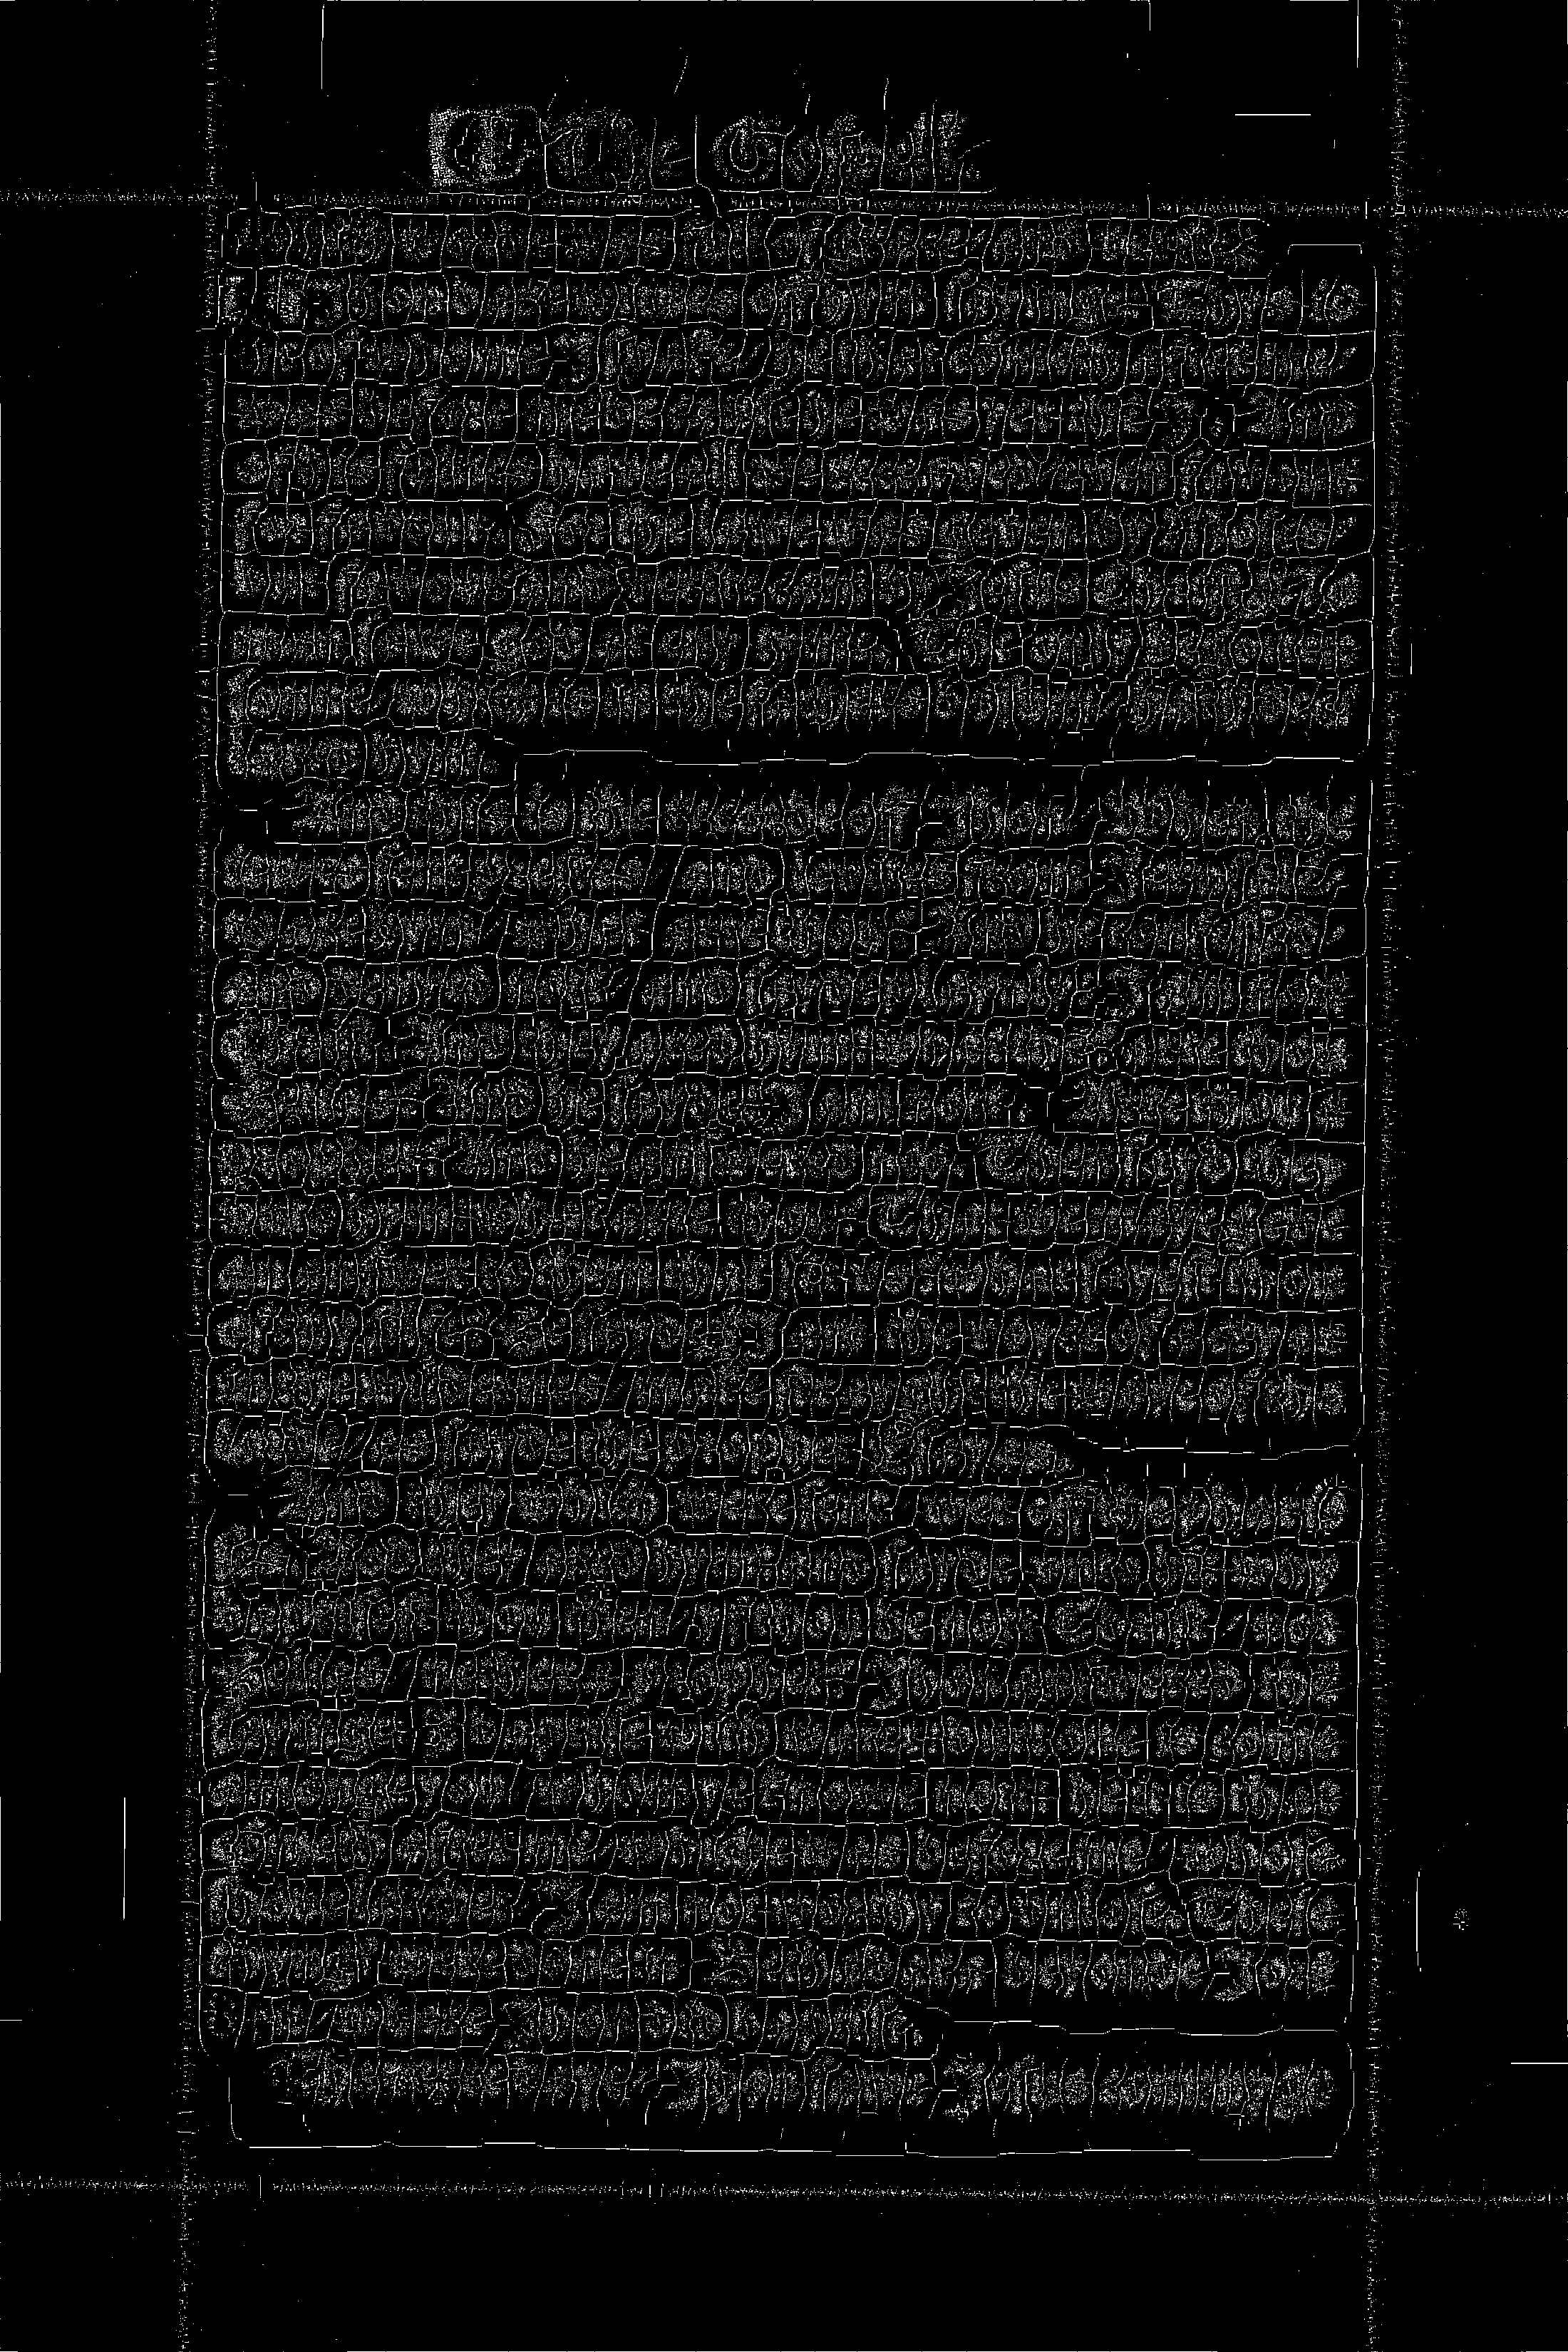

In [187]:
img = cv2.imread('1.cropped/john0002.jpg', 0)
size = np.size(img)
skel = np.zeros(img.shape,np.uint8)
 
ret,img = cv2.threshold(img,127,255,0)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3, 3))
done = False
 
while( not done):
    eroded = cv2.erode(img,kernel)
    temp = cv2.dilate(eroded,kernel)
    temp = cv2.subtract(img,temp)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()
 
    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True

Image.fromarray(skel)

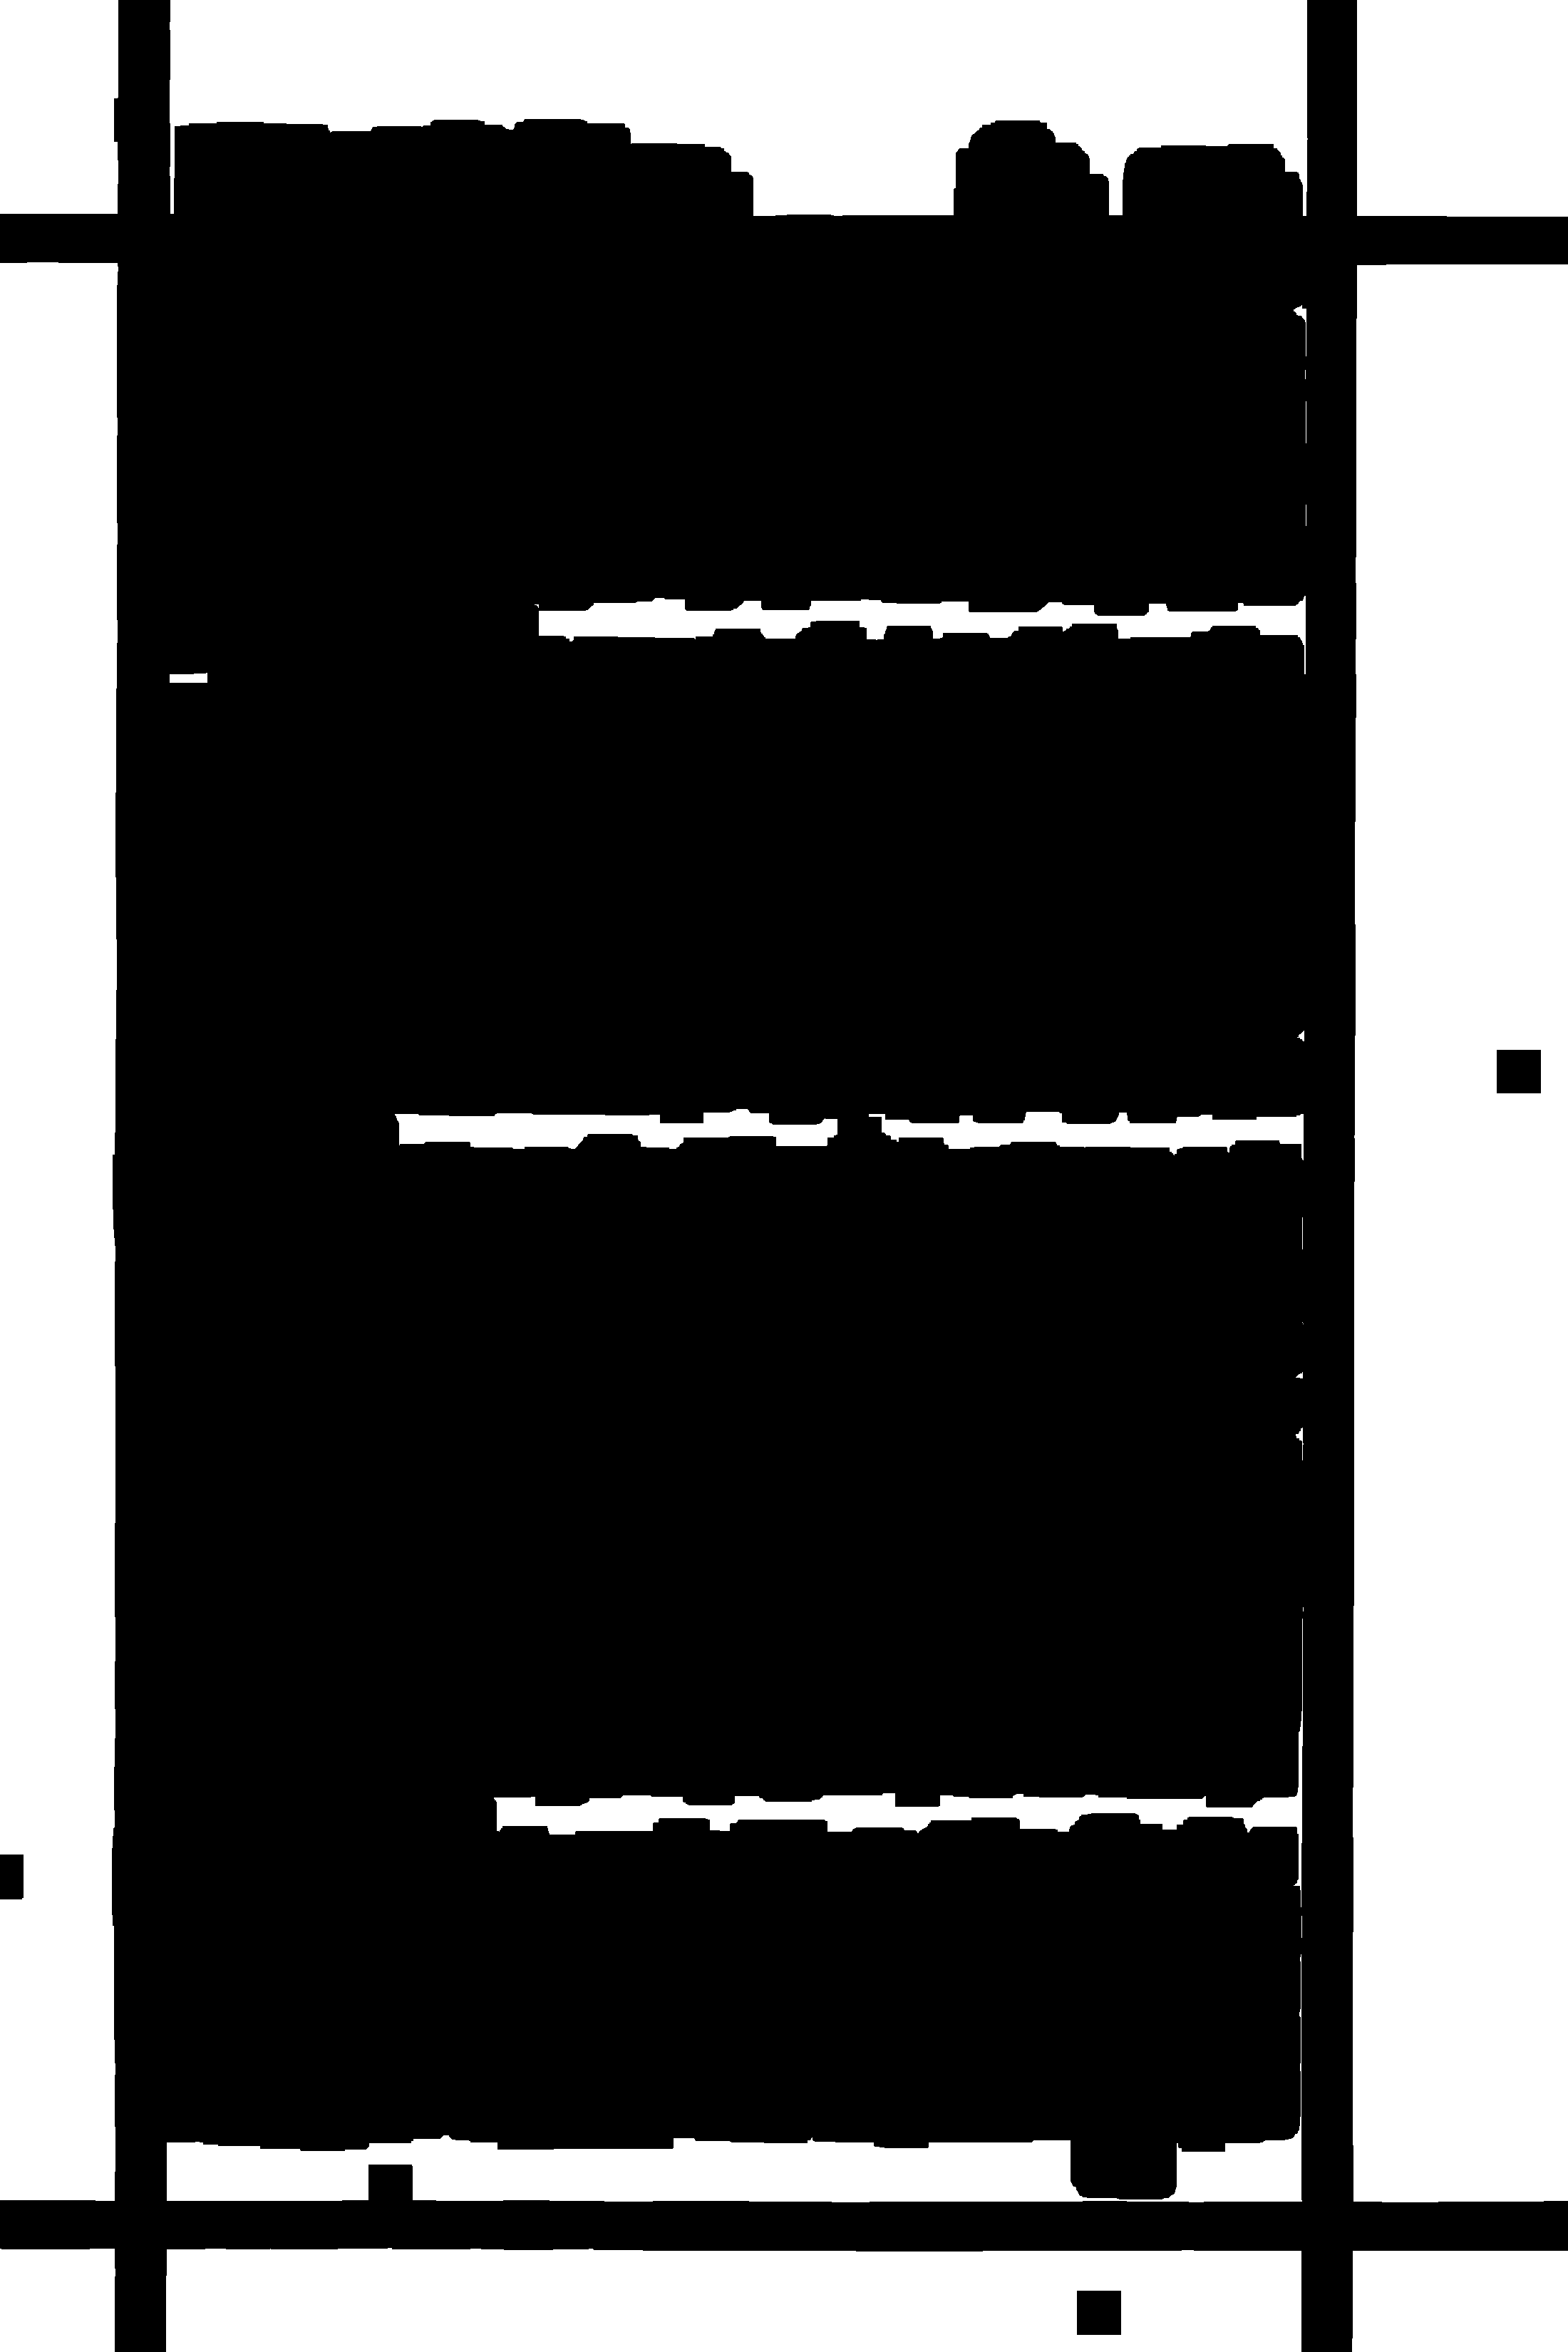

In [201]:
img = cv2.imread('1.cropped/john0003.jpg', 0)
 
ret,img = cv2.threshold(img,127,255,0)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3, 3))
done = False

skel = cv2.erode(img, kernel, iterations = 30)

#     eroded = cv2.erode(img, kernel, iterations = 7)
#     dilated = cv2.dilate(img, kernel, iterations = 3)
#     opening = cv2.morphologyEx(eroded, cv2.MORPH_OPEN, kernel)
#     closing = cv2.morphologyEx(eroded, cv2.MORPH_CLOSE, kernel)

#     eroded = cv2.erode(img,kernel)
#     temp = cv2.dilate(eroded,kernel)
#     temp = cv2.subtract(img,temp)
#     skel = cv2.bitwise_or(skel,temp)
#     img = eroded.copy()
 
#     zeros = size - cv2.countNonZero(img)
#     if zeros==size:
#         done = True

Image.fromarray(skel)